In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

# Ejercicio 4

## Ejercicio 4.a

La función de densidad viene dada por:

\begin{equation} f_{X}(x) = 
\left\{
  \begin{aligned}
    0 &\, & \mbox{si } \ x \leq 1 \\
    \frac{1}{9}(x - 1) &\, & \mbox{si } \ 1 < x \leq 2 \\
    \frac{1}{9} &\, & \mbox{si } \ 2 < x \leq 5 \\
    \frac{2}{45}\,x&-\frac{1}{9}& \mbox{si } \ 5 < x \leq 7 \\
    \frac{-1}{15}\,x&+\frac{10}{15}& \mbox{si } \ 7 < x \leq 10 \\
    0 &\, & \mbox{si } \ x \geq 10 \\
  \end{aligned}
  \right.
\end{equation}

la cual es una función de densidad, ya que la integral bajo su curva:

$\int_{-\infty}^{\infty} f_{X}(x) \,dx =
 \frac{1}{9}.\frac{1}{2} + 3.\frac{1}{9} +(\frac{1}{9} + \frac{1}{5}).\frac{2}{2} + \frac{1}{5}.\frac{3}{2} = 1$

## Ejercicio 4.b
La función de distribucion de $X$ viene dada por: $F_{X}(x) = \int_{-\infty}^{x} f_{X}(x) \,dx $

Realizando las operaciones pertinentes, obtuvimos:

\begin{equation}F_{X}(x)= 
\left\{
  \begin{aligned}
    0 &\, & \mbox{si } \ x \leq 1 \\
    \frac{(x-1)^{2}}{18} &\, & \mbox{si } \ 1 < x \leq 2 \\
    \frac{1}{18}+\frac{1}{9}(x-2) &\, & \mbox{si } \ 2 < x \leq 5 \\
    \frac{7}{18}+\frac{(x-5)x}{45}&& \mbox{si } \ 5 < x \leq 7 \\
    \frac{-(x-10)^{2}}{30}+1&& \mbox{si } \ 7 < x \leq 10 \\
    1 &\, & \mbox{si } \ x \geq 10 \\
  \end{aligned}
  \right.
\end{equation}


In [2]:
def F(x):
    if(x <= 1): 
        return 0
    if(x <= 2): 
        return ((x-1)**2)/18
    if(x <= 5): 
        return (1/18+1/9*(x-2))
    if(x <= 7): 
        return (7/18 +(x-5)*x/45)
    if(x <= 10): 
        return -((x-10)**2/30)+1
    else: return 1

x = np.arange(0., 11, 0.08)

y = []
for i in range(len(x)):
    y.append(F(x[i]))

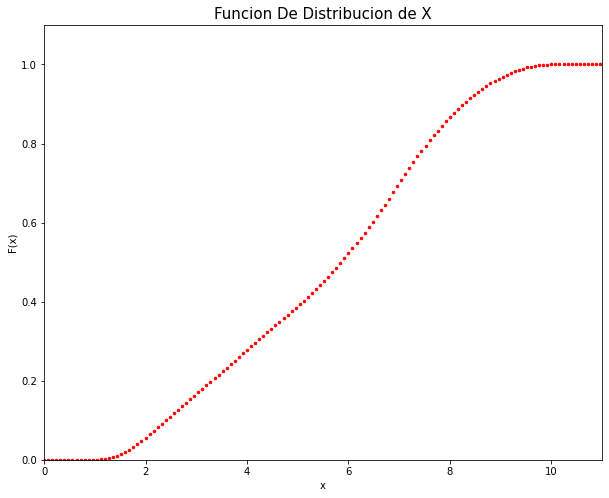

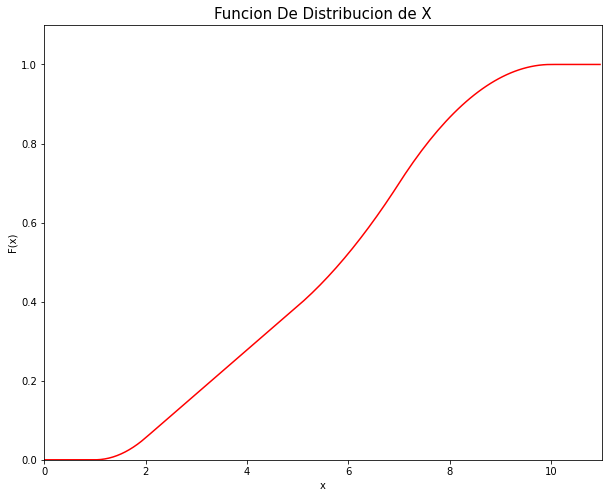

In [3]:
plt.figure(figsize=(10, 8))
plt.plot(x,y,c='red', ls='', ms=5, marker='.')
plt.title('Funcion De Distribucion de X', size=15)

ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])

plt.show()

plt.figure(figsize=(10, 8))

plt.title('Funcion De Distribucion de X', size=15)
plt.plot(x,y,c='red')
ax = plt.gca()
ax.set_ylim([0, 1.1])
ax.set_xlim([0, 11])
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
plt.show()


Calculamos la inversa de la funcion de distribución de $X$:  $F^{-1}_{X}(x)$ definida en el intervalo [0;1]
con imagen [1;10] donde la función es estrictamente creciente:



Realizando las operaciones pertinentes (considerando las ramas de las cuadráticas que se corresponden con
la concavidad de la función en los determinados trozos y pasando las ecuaciones a su forma canónica
para un mejor manejo de los cálculos), obtuvimos:

\begin{equation}F^{-1}_{X}(x)=
\left\{
  \begin{aligned}
    1 + \sqrt{18 x}  &\, & \mbox{si } \ 0 < x \leq \frac{1}{18} \\
    9 (x - \frac{1}{18}) + 2 &\, & \mbox{si } \ \frac{1}{18} < x \leq \frac{7}{18} \\
    \sqrt{45(x-\frac{1}{4})} + \frac{5}{2} &\, & \mbox{si } \ \frac{7}{18} < x \leq \frac{7}{10} \\
    10 - \sqrt{30(1- x)} && \mbox{si } \ \frac{7}{10} < x \leq 1 \\
  \end{aligned}
  \right.
\end{equation}

In [4]:
def F_inversa(x):
    if(x <= 0):
        return 0
    if(x <= 1/18):
        return (np.sqrt(18*x) + 1)
    if(x <= 7/18):
        return (9 * (x - 1/18) + 2)
    if(x <= 7/10):
        return np.sqrt(45 * (x - 1/4)) + 5/2
    if(x <= 1):
        return 10 - np.sqrt((1 - x) * 30)
    else: return 1


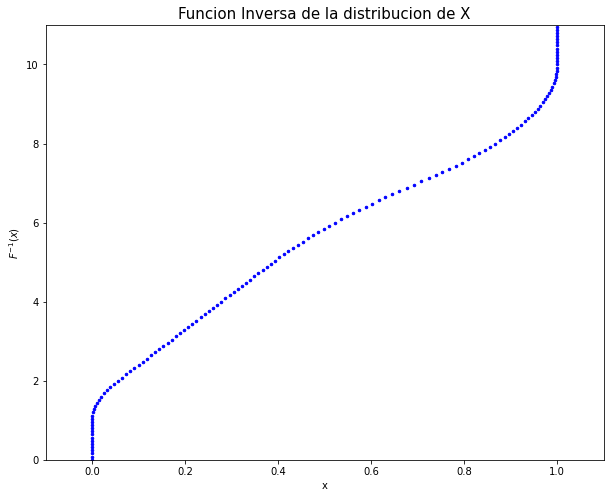

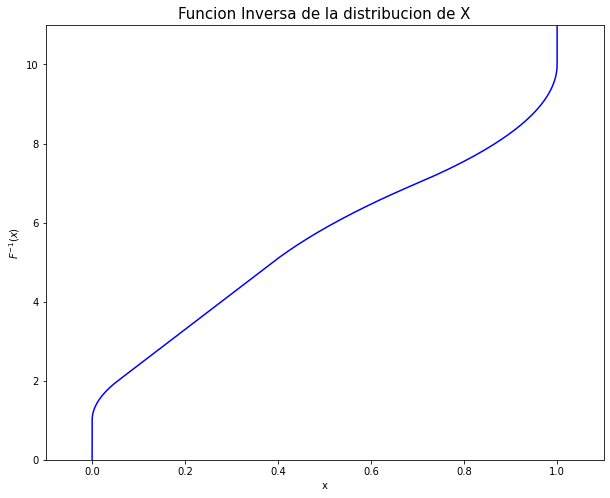

In [5]:
plt.figure(figsize=(10, 8))
plt.plot(y,x,c='blue', ls='', ms=5, marker='.')

plt.title('Funcion Inversa de la distribucion de X', size=15)
ax = plt.gca()
ax.set_ylim([0, 11])
ax.set_xlim([-0.1, 1.1])
ax.set_xlabel('x')
ax.set_ylabel('$F^{-1}( x )$')
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(y,x,c='blue')

plt.title('Funcion Inversa de la distribucion de X', size=15)
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('$F^{-1}( x )$')
ax.set_ylim([0, 11])
ax.set_xlim([-0.1, 1.1])

plt.show()

## Ejercicio 4.c
Conociendo la función inversa de la distribución y una muestra $(u_{1}, u_{2},..., u_{n})$ de $n$ variables
aleatorias iid uniformes en el intervalo [0;1], es fácil generar muestras de X mediante la transformación
definida por $F^{-1}_{X}(x)$ .

In [6]:
#Importamos las funciones del ejercicio 1
modulo = 2**32
multiplicador = 1013904223
incremento = 1664525
semilla = int((101503+103856+104258+102995)/4)

def generarRandomNormalizada(n):
    x = semilla
    result = []
    for i in range(n):
        result.append(x/modulo)
        x = (x * multiplicador + incremento) % modulo
    return result

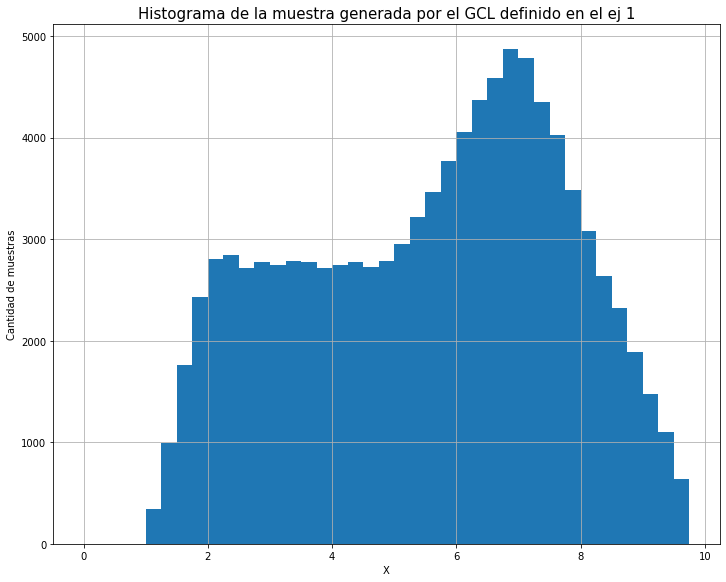

<Figure size 432x288 with 0 Axes>

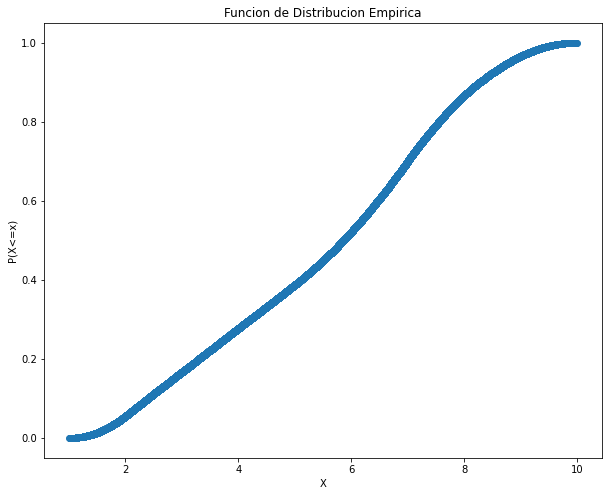

In [7]:
n = 100000
U = generarRandomNormalizada(n)
X = []
plt.figure(figsize=(10, 8))

for i in range(len(U)):
   X.append(F_inversa(U[i]))
plt.hist(X, bins=np.arange(0,10,0.25))
plt.title('Histograma de la muestra generada por el GCL definido en el ej 1', size=15)
plt.tight_layout()
plt.xlabel('X')
plt.ylabel('Cantidad de muestras')
plt.grid(True)
plt.show()

plt.figure()

plt.figure(figsize=(10, 8))
X = np.sort(X)
y = np.arange(1,n+1)/n
plt.title('Funcion de Distribucion Empirica')
plt.xlabel('X')
plt.ylabel('P(X<=x)')
plt.scatter(X, y)
plt.show()

Se observa entonces una gran similutud entre el histograma de la muestra y su funcion de densidad de probabilidad;
y por lo tanto tambien una gran similitud entre las funciones de acumulación de probabilidad.
